In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import gc
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_pickle('df.pkl')

## Feature Engineering - Department
Compute percentage of products in different departments.    
This may be imbalanced, as most of the products are from few departments (as shown in the exploratory data analysis).

In [3]:
df_dept = pd.pivot_table(df,values='order_number', index='user_id', columns='department' , aggfunc=np.sum)
df_dept.isna().sum().sort_values()/len(df)

department
produce            0.000351
dairy eggs         0.000424
snacks             0.000862
pantry             0.000897
beverages          0.000909
frozen             0.001185
bakery             0.001846
deli               0.002042
canned goods       0.002048
dry goods pasta    0.002313
breakfast          0.002628
meat seafood       0.002642
household          0.002702
personal care      0.003225
international      0.003751
babies             0.005069
missing            0.005182
other              0.005543
alcohol            0.005621
pets               0.005640
bulk               0.005714
dtype: float64

In [4]:
df_dept = df_dept.fillna(0) 

In [5]:
# For convenience, reorder the columns based on popularity of department 
dept_popularity = ['produce','dairy eggs','beverages','snacks','frozen','pantry','household',
                   'alcohol','babies','personal care','canned goods','bakery','deli',
                   'breakfast','dry goods pasta','meat seafood','pets','international',
                   'missing','other','bulk']
                  
df_dept = df_dept[dept_popularity]
df_dept  

department,produce,dairy eggs,beverages,snacks,frozen,pantry,household,alcohol,babies,personal care,...,bakery,deli,breakfast,dry goods pasta,meat seafood,pets,international,missing,other,bulk
user_id,,,,,,,,,,,,,,,,,,,,,
1,22.0,134.0,104.0,155.0,0.0,3.0,16.0,0.0,0.0,0.0,...,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,370.0,450.0,80.0,389.0,307.0,105.0,0.0,0.0,0.0,20.0,...,25.0,170.0,15.0,0.0,8.0,0.0,35.0,0.0,0.0,0.0
3,225.0,129.0,24.0,41.0,37.0,25.0,2.0,0.0,0.0,0.0,...,0.0,8.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6.0,0.0,8.0,5.0,7.0,0.0,3.0,6.0,0.0,0.0,...,4.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,64.0,27.0,0.0,2.0,6.0,8.0,5.0,0.0,0.0,0.0,...,0.0,4.0,0.0,2.0,0.0,0.0,15.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,41.0,46.0,3.0,0.0,8.0,4.0,0.0,0.0,2.0,0.0,...,4.0,11.0,0.0,0.0,1.0,0.0,4.0,6.0,0.0,0.0
206206,1498.0,1408.0,1195.0,1788.0,2438.0,608.0,419.0,0.0,0.0,431.0,...,127.0,238.0,26.0,21.0,70.0,0.0,110.0,0.0,58.0,0.0
206207,400.0,613.0,160.0,174.0,115.0,109.0,0.0,0.0,5.0,0.0,...,12.0,100.0,23.0,28.0,24.0,0.0,1.0,0.0,0.0,0.0


Drop "missing": it provides no information  
Drop "other": a variety of products are put under this department, therefore confounding the model

P.S. To utilize information associated with "other" category, we could build a classification model to classify department based on product name.

In [6]:
df_dept = df_dept.drop(['missing','other'],axis=1)

In [7]:
# normalize within row to get percentage in each dept
df_dept = df_dept.div(df_dept.sum(axis=1), axis=0)  
df_dept*100

department,produce,dairy eggs,beverages,snacks,frozen,pantry,household,alcohol,babies,personal care,canned goods,bakery,deli,breakfast,dry goods pasta,meat seafood,pets,international,bulk
user_id,,,,,,,,,,,,,,,,,,,
1,4.741379,28.879310,22.413793,33.405172,0.000000,0.646552,3.448276,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.465517,0.000000,0.000000,0.0,0.000000,0.0
2,18.208661,22.145669,3.937008,19.143701,15.108268,5.167323,0.000000,0.000000,0.000000,0.984252,2.854331,1.230315,8.366142,0.738189,0.000000,0.393701,0.0,1.722441,0.0
3,42.613636,24.431818,4.545455,7.765152,7.007576,4.734848,0.378788,0.000000,0.000000,0.000000,0.000000,0.000000,1.515152,0.000000,7.007576,0.000000,0.0,0.000000,0.0
4,11.538462,0.000000,15.384615,9.615385,13.461538,0.000000,5.769231,11.538462,0.000000,0.000000,5.769231,7.692308,19.230769,0.000000,0.000000,0.000000,0.0,0.000000,0.0
5,46.715328,19.708029,0.000000,1.459854,4.379562,5.839416,3.649635,0.000000,0.000000,0.000000,2.919708,0.000000,2.919708,0.000000,1.459854,0.000000,0.0,10.948905,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,33.064516,37.096774,2.419355,0.000000,6.451613,3.225806,0.000000,0.000000,1.612903,0.000000,0.000000,3.225806,8.870968,0.000000,0.000000,0.806452,0.0,3.225806,0.0
206206,13.903843,13.068498,11.091517,16.595508,22.628550,5.643215,3.888992,0.000000,0.000000,4.000371,3.684797,1.178764,2.209022,0.241322,0.194914,0.649712,0.0,1.020976,0.0
206207,22.099448,33.867403,8.839779,9.613260,6.353591,6.022099,0.000000,0.000000,0.276243,0.000000,2.541436,0.662983,5.524862,1.270718,1.546961,1.325967,0.0,0.055249,0.0


In [8]:
del df

# Clustering

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [10]:
# helper functions for clustering analysis
from cluster_helper import *

In [11]:
# Select sample to do preliminary analysis and decide on the number of clusters
# Choose around 25% of the data
n_sample = 50000

np.random.seed(42)
sample = df_dept.sample(n_sample)

#### 1.use silhoutte score to select number of clusters

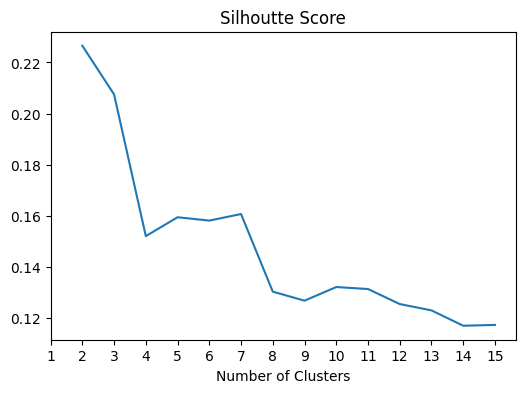

In [12]:
plot_silhoutte_score(sample,15)

#### 2. use validity index to select optimal number of clusters  
an explanation of validity index could be found at [here](https://www.researchgate.net/publication/265227128_A_Novel_Validity_Index_for_Determination_of_the_Optimal_Number_of_Clusters)

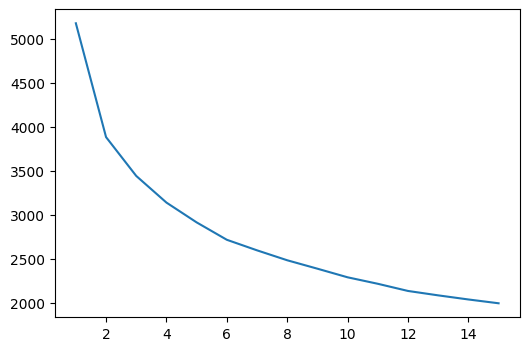

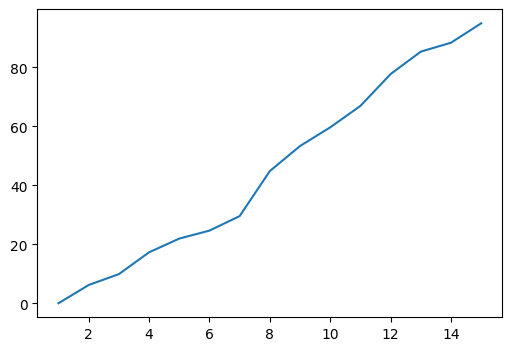

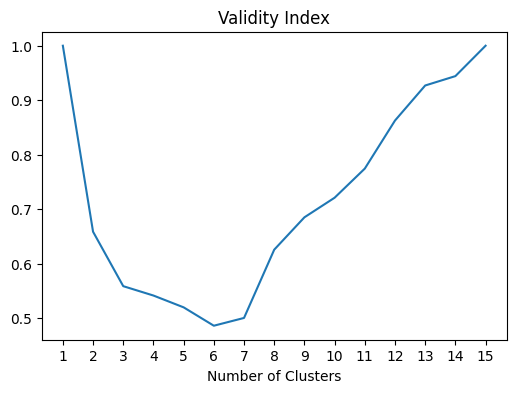

In [13]:
idx = validity_index(sample, 15)

Our selection methods suggest we use around 6-7 clusters for user segmentation

In [14]:
X = df_dept.copy()
X = X*100
X

department,produce,dairy eggs,beverages,snacks,frozen,pantry,household,alcohol,babies,personal care,canned goods,bakery,deli,breakfast,dry goods pasta,meat seafood,pets,international,bulk
user_id,,,,,,,,,,,,,,,,,,,
1,4.741379,28.879310,22.413793,33.405172,0.000000,0.646552,3.448276,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.465517,0.000000,0.000000,0.0,0.000000,0.0
2,18.208661,22.145669,3.937008,19.143701,15.108268,5.167323,0.000000,0.000000,0.000000,0.984252,2.854331,1.230315,8.366142,0.738189,0.000000,0.393701,0.0,1.722441,0.0
3,42.613636,24.431818,4.545455,7.765152,7.007576,4.734848,0.378788,0.000000,0.000000,0.000000,0.000000,0.000000,1.515152,0.000000,7.007576,0.000000,0.0,0.000000,0.0
4,11.538462,0.000000,15.384615,9.615385,13.461538,0.000000,5.769231,11.538462,0.000000,0.000000,5.769231,7.692308,19.230769,0.000000,0.000000,0.000000,0.0,0.000000,0.0
5,46.715328,19.708029,0.000000,1.459854,4.379562,5.839416,3.649635,0.000000,0.000000,0.000000,2.919708,0.000000,2.919708,0.000000,1.459854,0.000000,0.0,10.948905,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,33.064516,37.096774,2.419355,0.000000,6.451613,3.225806,0.000000,0.000000,1.612903,0.000000,0.000000,3.225806,8.870968,0.000000,0.000000,0.806452,0.0,3.225806,0.0
206206,13.903843,13.068498,11.091517,16.595508,22.628550,5.643215,3.888992,0.000000,0.000000,4.000371,3.684797,1.178764,2.209022,0.241322,0.194914,0.649712,0.0,1.020976,0.0
206207,22.099448,33.867403,8.839779,9.613260,6.353591,6.022099,0.000000,0.000000,0.276243,0.000000,2.541436,0.662983,5.524862,1.270718,1.546961,1.325967,0.0,0.055249,0.0


In [24]:
np.random.seed(42)
k = 6
km = KMeans(n_clusters=6)
km.fit(df_dept)
X['labels'] = km.predict(df_dept)

In [25]:
X['labels'].value_counts()

5    76490
2    51257
1    32582
3    25638
4    10156
0    10086
Name: labels, dtype: int64

Let's examine the cluster from largest to smallest, and see if we could generate nice interpretations for them.

In [27]:
X[X['labels']==5].describe() 

department,produce,dairy eggs,beverages,snacks,frozen,pantry,household,alcohol,babies,personal care,canned goods,bakery,deli,breakfast,dry goods pasta,meat seafood,pets,international,bulk,labels
count,76490.000000,76490.000000,76490.000000,76490.000000,76490.000000,76490.000000,76490.000000,76490.000000,76490.000000,76490.000000,76490.000000,76490.000000,76490.000000,76490.000000,76490.000000,76490.000000,76490.000000,76490.000000,76490.000000,76490.0
mean,34.647601,15.640736,6.647063,7.067799,6.332295,6.291962,1.656175,0.265244,0.994980,1.138328,3.809710,3.505877,3.464632,1.854230,2.869615,2.595468,0.162294,0.941552,0.114441,5.0
std,6.662545,6.929182,6.261881,5.790155,5.674079,5.111150,3.139374,2.018427,3.450122,2.336156,4.135020,3.851657,4.013654,2.833845,3.275602,3.514715,1.168999,1.771419,0.701724,0.0
min,16.842105,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0
25%,29.246323,10.937500,1.867376,2.701220,2.173913,2.842058,0.000000,0.000000,0.000000,0.000000,0.643087,0.458720,0.377020,0.000000,0.056754,0.000000,0.000000,0.000000,0.000000,5.0
50%,34.568541,15.631721,5.113636,5.917160,5.141777,5.320957,0.313589,0.000000,0.000000,0.000000,2.793296,2.597403,2.409639,0.830254,2.050162,1.508661,0.000000,0.000000,0.000000,5.0
75%,40.096618,20.253165,9.637343,10.127887,9.013940,8.531283,2.080925,0.000000,0.000000,1.384044,5.549482,5.194805,5.027175,2.668877,4.208945,3.819889,0.000000,1.254211,0.000000,5.0
max,50.793651,46.031746,40.376569,40.000000,60.377358,73.684211,66.666667,68.965517,63.805436,62.500000,60.714286,76.923077,76.991150,68.750000,41.496599,67.741935,62.500000,44.009217,67.164179,5.0


* People in this group purchase from a variety of departments
* They are slightly tilted towards produce, followed by dairy eggs

In [28]:
X[X['labels']==2].describe()  

department,produce,dairy eggs,beverages,snacks,frozen,pantry,household,alcohol,babies,personal care,canned goods,bakery,deli,breakfast,dry goods pasta,meat seafood,pets,international,bulk,labels
count,51257.000000,51257.000000,51257.000000,51257.000000,51257.000000,51257.000000,51257.000000,51257.000000,51257.000000,51257.000000,51257.000000,51257.000000,51257.000000,51257.000000,51257.000000,51257.000000,51257.000000,51257.000000,51257.000000,51257.0
mean,11.824893,12.356378,10.677770,9.293639,12.453128,7.774531,6.340808,2.215816,1.372513,3.499944,3.848980,4.465473,3.409451,2.900458,3.286777,2.400680,0.869307,0.965852,0.043602,2.0
std,7.284984,6.624306,7.744389,6.676452,11.721105,7.925739,10.496470,9.507489,5.360425,6.747511,5.236568,5.453060,5.265892,4.917963,4.439330,4.113369,3.902602,2.380789,0.561202,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,5.834933,7.666256,4.519191,3.944773,4.330709,2.834467,0.000000,0.000000,0.000000,0.000000,0.000000,0.310318,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
50%,12.282497,12.727273,9.623431,8.560311,9.854897,6.096675,2.943144,0.000000,0.000000,1.137240,2.255639,3.296703,1.805729,1.285898,1.868557,0.829876,0.000000,0.000000,0.000000,2.0
75%,17.891963,17.302452,15.789474,13.932526,17.229730,10.396870,7.792208,0.000000,0.000000,4.128271,5.569782,6.513872,4.761905,4.069686,4.895105,3.465347,0.000000,1.030928,0.000000,2.0
max,33.333333,36.585366,38.461538,36.363636,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,40.000000,2.0


* People in this group also purchase from a variety of departments, but no obvious preferences regarding departments.
* They buy foods like produce, frozen, and also like daily commodities like pantry, household, and personal care. What's more, they rarely buy anything from bulk.
* From the result, we could assume that they are loyal instacart customers, and regularly shop for the things they need.

In [29]:
X[X['labels']==1].describe()    # produce enthusiast

department,produce,dairy eggs,beverages,snacks,frozen,pantry,household,alcohol,babies,personal care,canned goods,bakery,deli,breakfast,dry goods pasta,meat seafood,pets,international,bulk,labels
count,32582.000000,32582.000000,32582.000000,32582.000000,32582.000000,32582.000000,32582.000000,32582.000000,32582.000000,32582.000000,32582.000000,32582.000000,32582.000000,32582.000000,32582.000000,32582.000000,32582.000000,32582.000000,32582.000000,32582.0
mean,58.687008,10.435647,4.238180,4.122168,3.760553,4.409661,1.015724,0.109580,0.240685,0.655770,2.762737,1.983254,2.171485,0.997699,1.581785,2.055627,0.042436,0.593149,0.136852,1.0
std,10.921061,7.500939,5.678296,5.107715,4.713897,4.473615,2.575233,1.244245,1.360957,1.816809,3.719439,3.263313,3.416243,2.279664,2.518489,3.397973,0.530993,1.437739,0.824308,0.0
min,43.621399,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,50.588235,4.742107,0.000000,0.000000,0.000000,0.847458,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,55.555556,9.897178,2.222222,2.610848,2.338908,3.483607,0.000000,0.000000,0.000000,0.000000,1.406552,0.521406,0.689655,0.000000,0.339609,0.414601,0.000000,0.000000,0.000000,1.0
75%,63.655838,15.111111,6.216912,5.982042,5.530089,6.468115,0.897238,0.000000,0.000000,0.396811,4.276316,2.862896,3.178913,1.109741,2.396270,3.061224,0.000000,0.507196,0.000000,1.0
max,100.000000,47.619048,47.586207,46.666667,52.830189,54.166667,50.000000,50.000000,36.036036,50.000000,50.332889,55.555556,51.063830,46.000000,50.000000,53.571429,31.372549,31.914894,40.947075,1.0


* People in this group buys a lot of fresh produce.
* Customers in this class have at least 43.6% of the items being produce in their purchase history.

In [30]:
X[X['labels']==3].describe()  # produce -- pantry, food_shoppers. dairy eggs

department,produce,dairy eggs,beverages,snacks,frozen,pantry,household,alcohol,babies,personal care,canned goods,bakery,deli,breakfast,dry goods pasta,meat seafood,pets,international,bulk,labels
count,25638.000000,25638.000000,25638.000000,25638.000000,25638.000000,25638.000000,25638.000000,25638.000000,25638.000000,25638.000000,25638.000000,25638.000000,25638.000000,25638.000000,25638.000000,25638.000000,25638.000000,25638.000000,25638.000000,25638.0
mean,17.603001,34.076995,7.401192,7.079077,5.656346,5.659160,2.003172,0.362225,1.002931,1.274244,2.581458,4.217537,3.124398,2.659771,2.376774,1.987945,0.204026,0.654536,0.075212,3.0
std,9.317890,12.075373,7.429997,6.590067,6.110032,5.903717,3.844925,2.307658,3.624349,2.924610,3.860399,5.066988,4.483445,4.448688,3.515961,3.596433,1.511987,1.712897,0.617437,0.0
min,0.000000,18.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
25%,11.250272,26.315789,1.382887,1.704545,0.427323,1.465201,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
50%,18.441558,30.769231,5.454829,5.664780,4.055376,4.325660,0.067238,0.000000,0.000000,0.000000,1.062316,2.825473,1.570681,0.934579,0.906344,0.155135,0.000000,0.000000,0.000000,3.0
75%,23.880597,37.742877,11.063480,10.619147,8.602151,7.986331,2.490797,0.000000,0.000000,1.349050,3.846154,6.372549,4.586634,3.636364,3.616940,2.777778,0.000000,0.529334,0.000000,3.0
max,51.282051,100.000000,45.153664,43.750000,58.333333,66.666667,55.555556,58.333333,55.855856,71.428571,65.141956,51.612903,76.923077,74.626866,43.478261,59.259259,56.250000,48.393574,42.622951,3.0


* People in label 3 is very similar with label 5, except that they like dairy eggs better

In [31]:
X[X['labels']==4].describe()  # snacks lover

department,produce,dairy eggs,beverages,snacks,frozen,pantry,household,alcohol,babies,personal care,canned goods,bakery,deli,breakfast,dry goods pasta,meat seafood,pets,international,bulk,labels
count,10156.000000,10156.000000,10156.000000,10156.000000,10156.000000,10156.000000,10156.000000,10156.000000,10156.000000,10156.000000,10156.000000,10156.000000,10156.000000,10156.000000,10156.000000,10156.000000,10156.000000,10156.000000,10156.000000,10156.0
mean,11.173316,9.454029,12.518404,40.897922,4.019096,4.171389,2.804583,0.867242,0.260310,1.539134,1.152474,2.505765,2.737313,3.373913,0.896368,0.840503,0.148632,0.423354,0.216255,4.0
std,10.338081,8.736324,10.832545,15.576033,6.584629,5.690091,5.634937,4.667532,1.874478,3.934507,3.166502,4.721072,5.335243,5.930763,2.473861,2.908825,1.284245,1.576400,1.667811,0.0
min,0.000000,0.000000,0.000000,19.519095,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
25%,1.648837,1.006259,2.854796,29.702970,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
50%,9.110865,8.115366,10.746681,36.038323,0.467290,2.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.272620,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
75%,18.073663,14.892811,20.000000,47.368421,5.839416,5.978541,3.300091,0.000000,0.000000,1.232938,0.391979,3.409091,3.571429,4.611558,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
max,52.380952,50.806452,50.602410,100.000000,57.377049,57.142857,66.666667,67.549669,45.000000,60.000000,45.714286,67.035670,58.333333,77.369165,39.736070,69.230769,43.283582,30.263158,40.588235,4.0


* Obviously, they are snack lovers. 
* They tend to purchase beverages (to go with snacks!) as well.

In [32]:
X[X['labels']==0].describe()   # beverage lover

department,produce,dairy eggs,beverages,snacks,frozen,pantry,household,alcohol,babies,personal care,canned goods,bakery,deli,breakfast,dry goods pasta,meat seafood,pets,international,bulk,labels
count,10086.000000,10086.000000,10086.000000,10086.000000,10086.000000,10086.000000,10086.000000,10086.000000,10086.000000,10086.000000,10086.000000,10086.000000,10086.000000,10086.000000,10086.000000,10086.000000,10086.000000,10086.000000,10086.000000,10086.0
mean,8.648961,8.372684,50.043465,8.950578,3.367735,3.662122,4.831784,1.261569,0.249713,2.072859,1.135670,1.854669,1.550856,1.689607,0.748968,0.805817,0.288171,0.386339,0.078432,0.0
std,10.046819,9.207795,18.441410,9.744534,6.328932,5.808481,8.774043,6.074605,1.904996,5.112565,3.491369,4.429543,3.958848,4.273919,2.557179,2.943773,2.136322,1.649868,0.976913,0.0
min,0.000000,0.000000,26.923077,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,36.047875,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,5.000000,5.882353,44.025157,5.882353,0.000000,1.189618,0.284804,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,14.533725,13.664388,58.416079,14.887183,4.370437,5.163562,6.014860,0.000000,0.000000,1.623675,0.000000,1.742856,1.057842,1.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,51.485149,53.846154,100.000000,48.000000,60.000000,55.555556,71.812081,71.253071,51.351351,67.213115,69.767442,66.666667,61.538462,66.666667,43.396226,67.073171,50.000000,42.857143,30.588908,0.0


* Lastly, this group represents beverage lovers.


In [36]:
X.loc[X['labels']==5,'class'] = 'food_regular_produce'
X.loc[X['labels']==2,'class'] = 'everything_shopper'
X.loc[X['labels']==1,'class'] = 'produce_enthusiast'
X.loc[X['labels']==3,'class'] = 'food_regular_dairy'
X.loc[X['labels']==4,'class'] = 'snack_lover'
X.loc[X['labels']==0,'class'] = 'beverage_lover'


X.head()

department,produce,dairy eggs,beverages,snacks,frozen,pantry,household,alcohol,babies,personal care,...,bakery,deli,breakfast,dry goods pasta,meat seafood,pets,international,bulk,labels,class
user_id,,,,,,,,,,,,,,,,,,,,,
1,4.741379,28.879310,22.413793,33.405172,0.000000,0.646552,3.448276,0.000000,0.0,0.000000,...,0.000000,0.000000,6.465517,0.000000,0.000000,0.0,0.000000,0.0,4,snack_lover
2,18.208661,22.145669,3.937008,19.143701,15.108268,5.167323,0.000000,0.000000,0.0,0.984252,...,1.230315,8.366142,0.738189,0.000000,0.393701,0.0,1.722441,0.0,2,everything_shopper
3,42.613636,24.431818,4.545455,7.765152,7.007576,4.734848,0.378788,0.000000,0.0,0.000000,...,0.000000,1.515152,0.000000,7.007576,0.000000,0.0,0.000000,0.0,5,food_regular_produce
4,11.538462,0.000000,15.384615,9.615385,13.461538,0.000000,5.769231,11.538462,0.0,0.000000,...,7.692308,19.230769,0.000000,0.000000,0.000000,0.0,0.000000,0.0,2,everything_shopper
5,46.715328,19.708029,0.000000,1.459854,4.379562,5.839416,3.649635,0.000000,0.0,0.000000,...,0.000000,2.919708,0.000000,1.459854,0.000000,0.0,10.948905,0.0,5,food_regular_produce


### Personalized Marketing Insights

* **food regulars**: People in this group don't have specific likes, and purchase produce and dairy products, which are the must-haves in many households.   
--> For this group, instacart could try exploring their likes and dislikes in other departments.  
--> Since they buy grocery regularly, we could also provide benefits for delivery to let them feel that we care for them.  

* **snack and beverage lovers**: For this group, we could utilize market basket analysis to increase sales. For example, we could recommend snacks that go well with the beverages for berverage lovers, and vice versa. 

* **everything_shopper**: People in this group are loyal customers of instacarte and already purchased a wide variety of products, so we could increase their purchase volume by sending out coupons and notifications. 

* **produce_enthusiast**:  
-> We could spend effort on improving their user experience. I assume people in this category enjoy cooking (I am one of them!). Instacart could recommend recipes based on the produce they buy, and attach link to other ingredients.   
-> What's more, there are rich information in *product_name*, which could be used to further analyze the different preferences of produce enthusiats.  
-> Lastly, instacart could try recommending products in other categories and expand the purchased product types.  


In [37]:
X.to_csv('user_segment.csv')